In [1]:
from utils.evaluation_utils import get_inference_df
import os 
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import utils.constants as c

if "notebooks" in os.getcwd(): 
    os.chdir("..")

In [2]:
inference_df = get_inference_df([208, 209, 197], ground_truth_resolutions=["1h"], split="eval", forecasting_hours=4)


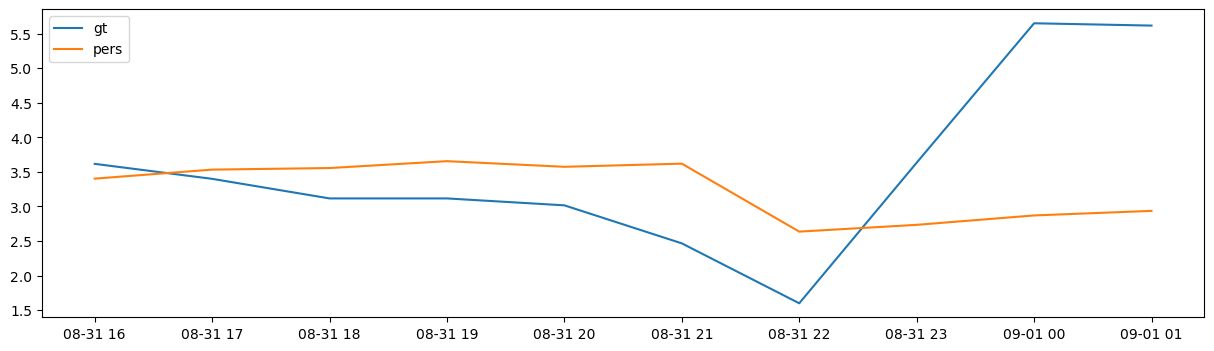

In [11]:


plt.figure(figsize=(15, 4))
plt.plot(inference_df.index[90:100],
         inference_df["ground_truth_1h_resolution"].iloc[90:100],
         label="gt")
plt.plot(inference_df.index[90:100],
         inference_df["run_208_predictions"].iloc[90:100],
         label="pers")

plt.legend()
plt.show()